# Customer Segmentation And Profiling

### Project Introduction

In this project, I aim to address the critical challenge of understanding and optimizing customer behavior within a grocery firm’s database. By employing Principal Component Analysis (PCA) for dimensionality reduction, followed by agglomerative clustering, the goal is to segment customers into distinct groups that share similar characteristics. Accurately identifying these segments will enable the business to enhance its customer engagement strategies and tailor its products and services to meet specific customer needs effectively.

Customer segmentation is essential for any business as it allows for the nuanced understanding of diverse customer groups, leading to improved satisfaction and increased profitability. Gaining insights into the distinct behaviors and preferences of each segment empowers the grocery firm to develop more targeted marketing campaigns, boost customer retention rates, and optimize resource allocation for maximum impact. This tailored approach not only facilitates personalization but also enhances overall decision-making processes within the organization.

The analysis will leverage customer demographic and transaction data to uncover valuable insights. Using PCA will reduce the dimensionality of the dataset while preserving the variance, making it easier to visualize and interpret. Following this, agglomerative clustering will be employed to identify natural groupings based on the reduced dimensions. This method offers flexibility in exploring the data without predefining the number of clusters, allowing for a deeper understanding of hierarchical relationships among customer segments. Through this approach, the grocery firm can refine its product offerings, enhance personalization efforts, and make informed, data-driven decisions that contribute to improved business performance.

However, challenges may arise during the clustering phase, particularly in ensuring the interpretability of the resulting segments. Some clusters may appear too broad, complicating the extraction of actionable insights. To address these challenges, techniques such as silhouette analysis will be utilized to determine the optimal number of clusters, thereby enhancing clarity and interpretability. Additionally, insights from previous marketing campaigns will be integral to the analysis; by understanding past successes and failures, the grocery firm can refine the clustering process and develop more targeted, effective marketing strategies. By integrating customer feedback and external market trends, the project aims to deepen our understanding of customer preferences and behaviors, ultimately creating personalized marketing campaigns that resonate with each identified segment and drive greater customer loyalty and business success.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import warnings
import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# Data Cleaning and Feature Engineering


### Data Overview

citation: Romero-Hernandez, O. (Date Unknown). Customer Personality Analysis. Retrieved September 25, 2024 from https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

The dataset used for this project, titled “Customer Personality Analysis,” was compiled by Dr. Omar Romero-Hernandez and is available on Kaggle. It contains 2,240 observations and 29 variables, providing a robust framework for examining customer behavior in a grocery firm context. Each observation represents a unique customer, capturing various demographic and transaction-related attributes, such as age, income, family size, spending habits, and purchase frequencies. 

The dataset is particularly valuable because it offers a mix of categorical and numerical variables, facilitating diverse analytical approaches. This comprehensive collection of customer data allows for a nuanced understanding of consumer preferences and purchasing behaviors. 

In [33]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")

To clean the data and prepare it for model training, I must first figure out what to fix. To do that, I will display some information about the dataset as a whole and each column separately.

In [34]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From the output displayed above, the following is evident :

* The income column has missing values in income
* Dt_Customer lists dates but is not parsed as DateTime but an object instead
* The columns Education and Marital_Status are also object types, which will need to be encoded to integer format.

There are a few ways to deal with the issue of the missing data in the Income column. One common method is imputation, where you replace missing values with the mean, median, or mode of the existing data. Another approach is using predictive models like regression to estimate the missing values based on other features. Forward or backward filling (using adjacent values) is another option, though more suitable for time-series data. Lastly, you could use techniques like K-Nearest Neighbors (KNN) imputation, which estimates missing values based on the values of similar data points. 

Since there are 2000+ observations, however, I will just drop the whole rows where the Income data is missing.

In [36]:
data = data.dropna()
print('There are', len(data), 'observations in the dataset.')

There are 2216 observations in the dataset.


In [37]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format = "%d-%m-%Y" )
print(format(data["Dt_Customer"]))
print('Oldest customer record: ', min(data["Dt_Customer"]))
print('Newest customer record:', max(data["Dt_Customer"]))

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]
Oldest customer record:  2012-07-30 00:00:00
Newest customer record: 2014-06-29 00:00:00


Note that even though there are 2216 observations left in the dataset after the removal of rows with missing income data, the IDs are still 0- 2239.

For easier tracking purposes, I will make  anew column that calculates the age of the account. Thus it will measure the time form the account creation (Dt_Customer) until the information retrieval date, which will be assumed to be the last date mentioned in the dataset.

In [38]:
d1 = max(data["Dt_Customer"]).date()

days = []
for i in data["Dt_Customer"]:
    delta = (d1 - i.date()).days
    days.append(delta)
data["Account_Age"] = days
data["Account_Age"] = pd.to_numeric(data["Account_Age"], errors="coerce")

print('Going off of', d1, 'as the information retrieval date, the Account Age sare as follwos:')
data[['Account_Age', 'Dt_Customer']].head()

Going off of 2014-06-29 as the information retrieval date, the Account Age sare as follwos:


,Account_Age,Dt_Customer
0,663,2012-09-04
1,113,2014-03-08
2,312,2013-08-21
3,139,2014-02-10
4,161,2014-01-19


Derive the "Age" of each customer using their birth year from the "Year_Birth" column.

In [39]:
data["Age"] = 2021-data["Year_Birth"]

Introduce a new feature called "Spent" to capture the total amount a customer has spent across different categories over two years. Rename the categories to work better on charts and other visualiztions.

In [40]:
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


Add a feature labeled "Children" to represent the total number of children, including both younger kids and teenagers, in a household.Additionally, I will create a feature "Family_Size" to provide a clearer understanding of the size of each household.

In [41]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
marital_status_mapping = {
    "Married": 2, "Together": 2, 
    "Absurd": 1, "Widow": 1, "YOLO": 1, 
    "Divorced": 1, "Single": 1
}
data["Marital_Status_Int"] = data["Marital_Status"].map(marital_status_mapping).fillna(1)
data["Children"] = data["Kidhome"] + data["Teenhome"]
data["Family_Size"] = data["Marital_Status_Int"] + data["Children"]
data[["Marital_Status", "Marital_Status_Int", "Children", "Family_Size"]].head()

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 



,Marital_Status,Marital_Status_Int,Children,Family_Size
0,Single,1.0,0,1.0
1,Single,1.0,2,3.0
2,Together,2.0,0,2.0
3,Together,2.0,1,3.0
4,Married,2.0,1,3.0


Break down the "Education" column by grouping it into three broader categories.

In [42]:
print("Total categories in the feature Education:\n", data["Education"].value_counts())
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


Drop the unneccesary columns.

In [43]:
data = data.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID", 'AcceptedCmp3', 'AcceptedCmp4', 
    'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'], axis=1)

Examine the new features for outliers.

<Figure size 640x480 with 0 Axes>

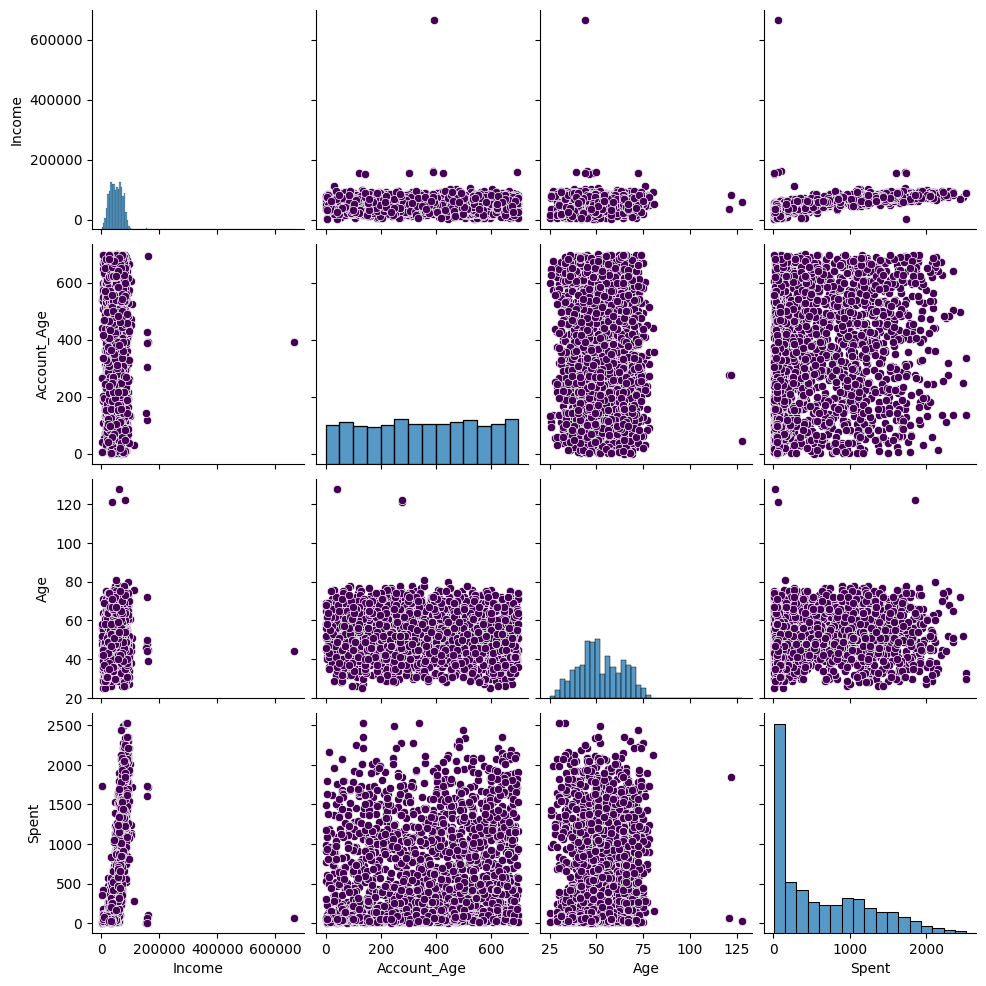

In [44]:
To_Plot = [ "Income", "Account_Age", "Age", "Spent"]
plt.figure()
sns.pairplot(data[To_Plot], plot_kws={'color': '#440154FF'})
plt.show()

As indicated on the pairplot above, there are some outliers in the Age and Income columns. 

In [45]:
top_5_ages = data["Age"].nlargest(5)
print("Top 5 highest values in the Age column:\n", top_5_ages, '\n')
top_5_ages = data["Income"].nlargest(5)
print("Top 5 highest values in the Income column:\n", top_5_ages, '\n')

Top 5 highest values in the Age column:
 239     128
339     122
192     121
1950     81
424      80
Name: Age, dtype: int64 

Top 5 highest values in the Income column:
 2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
Name: Income, dtype: float64 



Based on the data above, set caps on Income and Age.

In [46]:
data = data[(data["Age"]<100)]
data = data[(data["Income"]<500000)]
data.shape

(2212, 22)

Here is the dataframe after feature engineering.

In [47]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Account_Age,Age,Spent,Marital_Status_Int,Children,Family_Size
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,...,4.088156,2.672242,5.806510,5.321429,353.714286,52.086347,607.268083,1.645570,0.947559,2.593128
std,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,...,2.742187,2.927542,3.250939,2.425597,202.494886,11.701599,602.513364,0.478449,0.749466,0.906236
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000,1.000000,0.000000,1.000000
25%,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,2.000000,0.000000,3.000000,3.000000,180.000000,44.000000,69.000000,1.000000,0.000000,2.000000
50%,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,4.000000,2.000000,5.000000,6.000000,356.000000,51.000000,397.000000,2.000000,1.000000,3.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,6.000000,4.000000,8.000000,7.000000,529.000000,62.000000,1048.000000,2.000000,1.000000,3.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,27.000000,28.000000,13.000000,20.000000,699.000000,81.000000,2525.000000,2.000000,3.000000,5.000000


To find if there are any collinear features, I will look at a correlation matrix. Since it cannot include categorical variables, I will check for categorical columns and label encode them into numerical.

In [48]:
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

LE=LabelEncoder()
data['Education']=data[['Education']].apply(LE.fit_transform)

encoding_mapping = dict(zip(LE.classes_, range(len(LE.classes_))))
print("Encoding mapping for Education:")
print(encoding_mapping)

Non-numeric columns: Index(['Education'], dtype='object')
Encoding mapping for Education:
{'Graduate': 0, 'Postgraduate': 1, 'Undergraduate': 2}


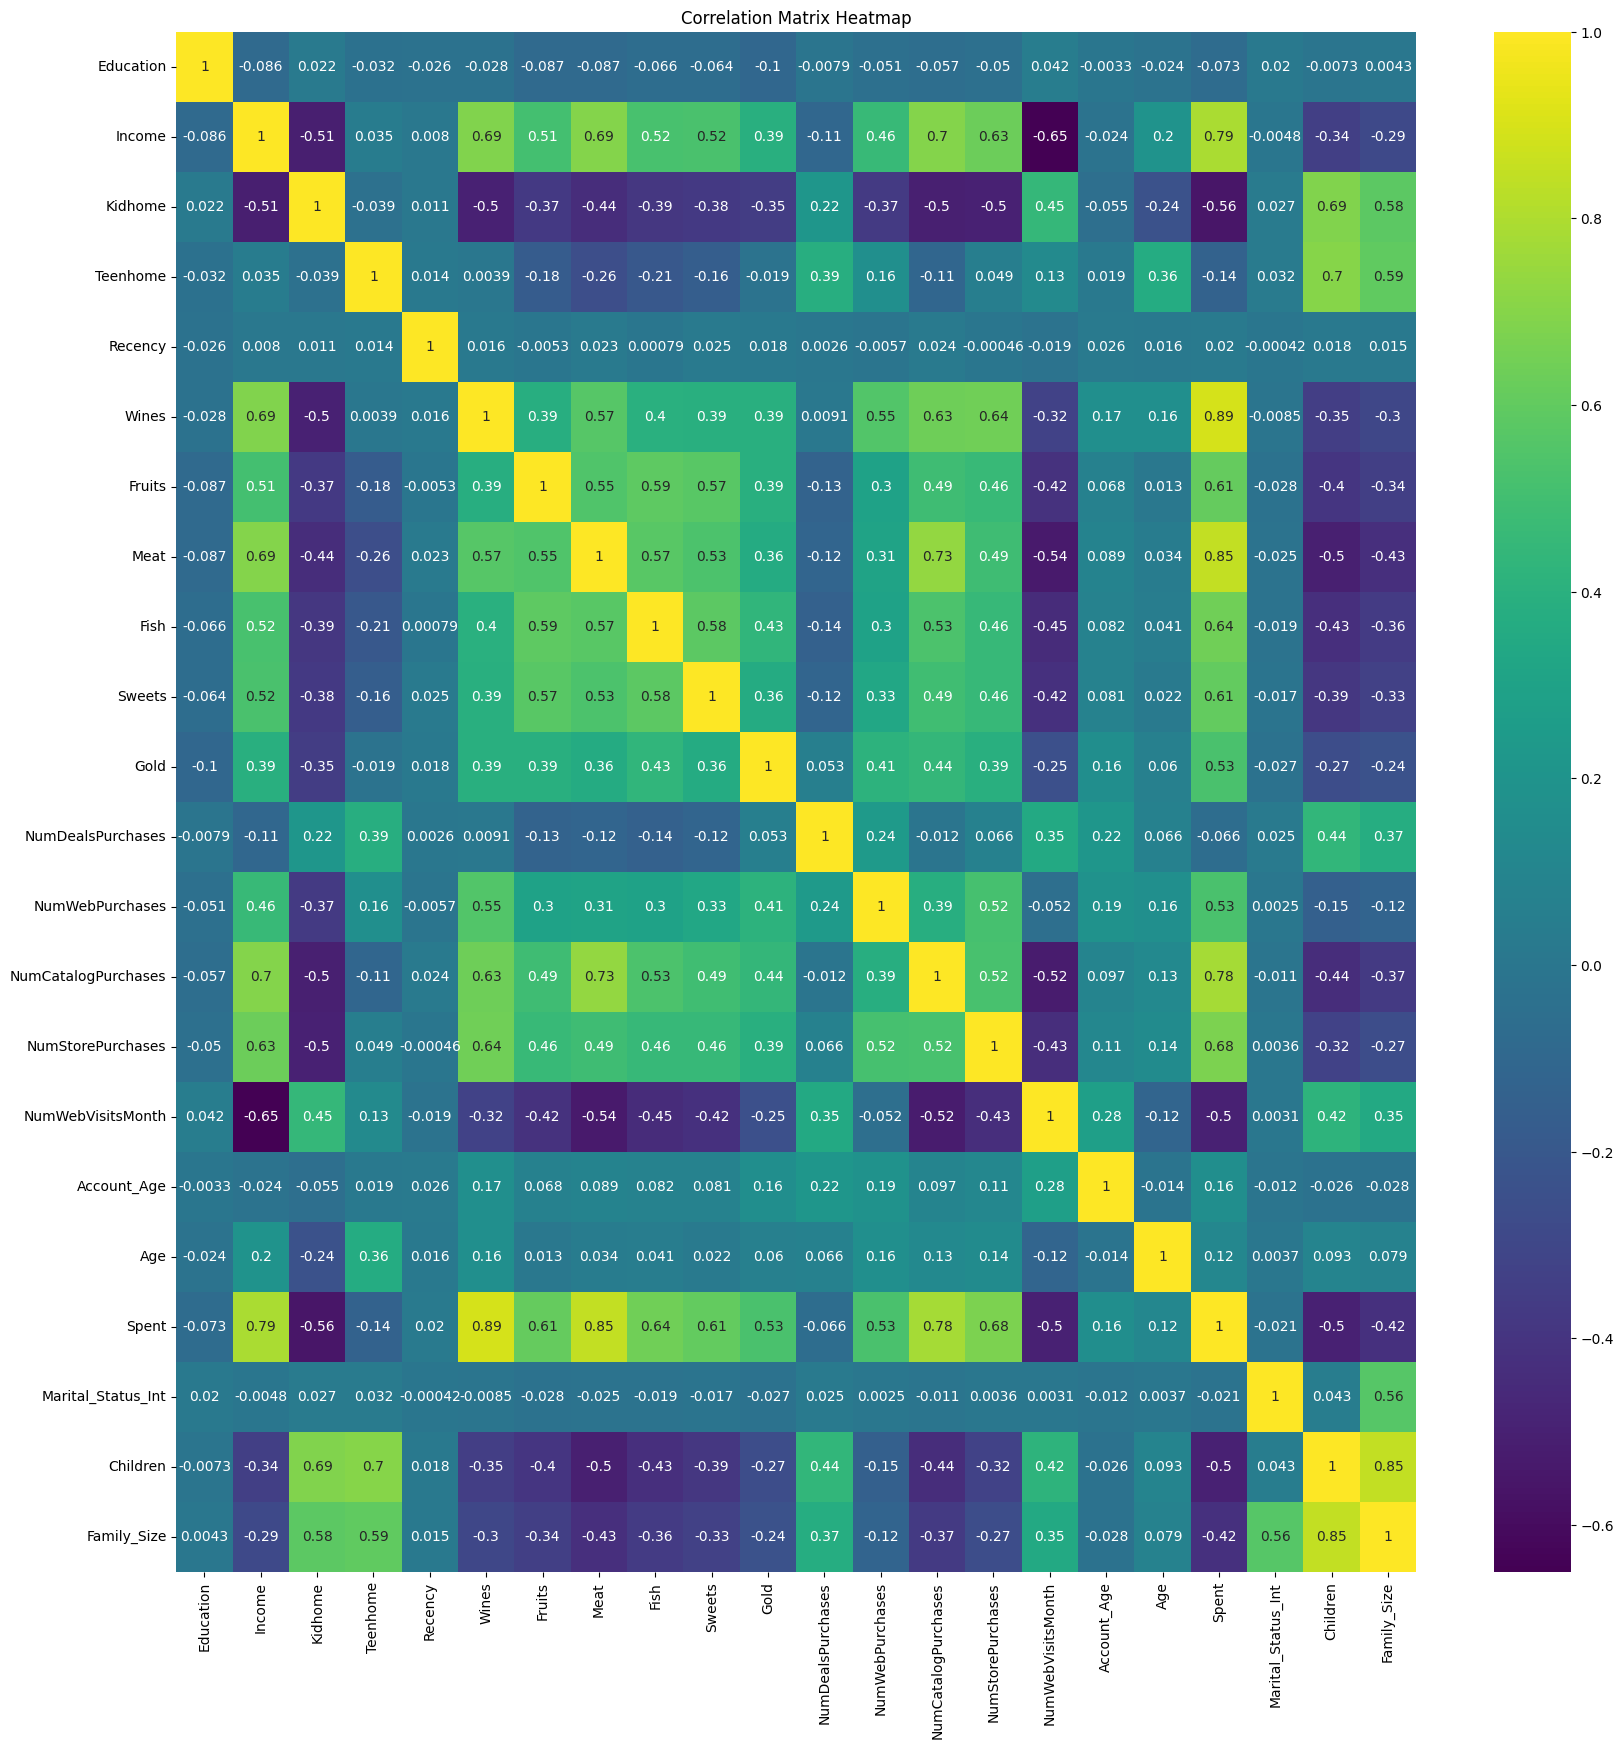

In [49]:
corrmat = data.corr()
plt.figure(figsize=(20, 20))  
sns.heatmap(corrmat, annot=True, cmap = "viridis")
plt.title('Correlation Matrix Heatmap')
plt.show()

# DIMENSIONALITY REDUCTION
In this analysis, I face the challenge of dealing with a dataset that contains numerous attributes, or features, which will ultimately inform my classification outcomes. A higher number of features complicates the modeling process, especially since many of these features can be correlated and redundant. To address this issue, I will implement dimensionality reduction techniques to streamline the feature set before passing the data through a classifier.

Dimensionality reduction involves the process of reducing the number of random variables under consideration by transforming the original set of variables into a smaller set of principal variables that retain the essential information.

Principal Component Analysis (PCA) is a powerful unsupervised learning algorithm that serves this purpose effectively. It reduces the dimensionality of datasets while enhancing interpretability, all while minimizing the loss of information. By transforming correlated features into a new set of uncorrelated variables called principal components, PCA allows me to capture the most significant patterns in the data, facilitating more efficient and effective analysis.

The application of PCA is particularly beneficial for my project, as it enables me to simplify my feature space from potentially high dimensions down to a manageable number. This reduction will help improve the performance of my classifiers, making it easier to identify patterns and relationships within the data.

Steps in this section include:

* Scaling the features 
* Performing dimensionality reduction using PCA
* Visualizing the reduced dataset

In this project, I will reduce the dimensionality of the dataset to three principal components, which will allow for easier visualization and interpretation while preserving the critical information necessary for effective classification. Choosing three components strikes a balance between interpretability and complexity; it enables the creation of 3D plots to visualize relationships and clusters within the data.

Often, the first few principal components capture the majority of the variance in the dataset. By examining the explained variance ratio, I can ensure that these three components account for a significant portion of the total variance (e.g., over 70-80%). Adding more components might provide diminishing returns in terms of information gain.

Moreover, limiting the number of components reduces the risk of overfitting, especially in smaller datasets, as a more complex model may fit noise rather than underlying patterns. Lastly, high-dimensional data can lead to challenges, such as the curse of dimensionality, where distances between points become less meaningful. Therefore, keeping the dimensionality to three components helps mitigate these issues and maintains the effectiveness of subsequent classification algorithms.

To ensure that the features in the dataset contribute equally to the Principal Component Analysis (PCA), I employed the StandardScaler to standardize the data. The standardization process involves centering the data around the mean and scaling it to have a unit variance, which is essential when dealing with features that may have different units or ranges. By fitting the StandardScaler to the dataset and transforming it, I create a new DataFrame, scaled_data_copy, where each feature is now on a comparable scale. This step is vital, as PCA is sensitive to the variances of the original variables; features with larger scales could disproportionately influence the results. Standardizing the data helps to achieve a balanced representation, allowing the PCA to effectively identify the principal components that capture the most variance in the dataset without biasing the analysis towards any specific feature.

In [50]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data_copy = pd.DataFrame(scaler.transform(data), columns=data.columns)

This code performs Principal Component Analysis (PCA) on the scaled dataset, reducing its dimensionality to three principal components. The PCA model is fitted to the scaled data, transforming it into a new DataFrame with three columns. The final line provides a summary of the transformed data, including statistical descriptions.

In [51]:
pca = PCA(n_components=3)
pca.fit(scaled_data_copy)
PCA_data_copy = pd.DataFrame(pca.transform(scaled_data_copy), columns=(["col1","col2", "col3"]))
PCA_data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,3.854662e-17,2.799917,-5.904566,-2.498227,-0.737394,2.427765,7.299003
col2,2212.0,-6.424437e-18,1.635342,-3.789220,-1.306107,-0.180608,1.158272,6.355786
col3,2212.0,1.003818e-17,1.231685,-3.625050,-0.853816,-0.052026,0.863302,6.743546


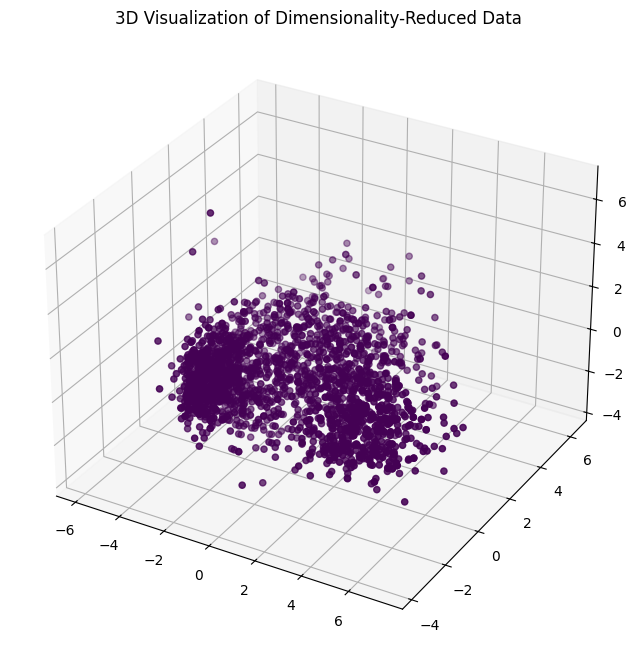

In [52]:
x =PCA_data_copy["col1"]
y =PCA_data_copy["col2"]
z =PCA_data_copy["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, color='#440154FF')
ax.set_title("3D Visualization of Dimensionality-Reduced Data")
plt.show()

# CLUSTERING

Having successfully reduced the dataset to three dimensions, I will now leverage unsupervised learning techniques to explore underlying patterns within the data. Specifically, I will implement Agglomerative Clustering, a hierarchical approach that progressively merges data points until the desired number of clusters is formed. 

Unsupervised learning is particularly advantageous in this context, as it allows for the identification of natural groupings without any predefined labels or target outcomes. This is crucial for understanding the data's structure and discovering hidden relationships that might not be immediately evident. By analyzing customer behaviors and preferences through clustering, I can gain valuable insights into distinct segments within the dataset.

The clustering process will involve several steps:

* **Elbow Method**: I will employ this method to ascertain the optimal number of clusters. It evaluates the trade-off between the number of clusters and the explained variance, helping to identify the point at which additional clusters provide diminishing returns.
* **Agglomerative Clustering**: This technique will be utilized to group the data based on the similarities identified in the reduced dimensions, allowing for a nuanced understanding of how different data points relate to one another.
* **Visualizing the Clusters**: Finally, I will create scatter plots to visualize the formed clusters, providing an intuitive representation of how the data points are distributed and highlighting the relationships between them. This visualization will further enhance the insights gained from the clustering process.

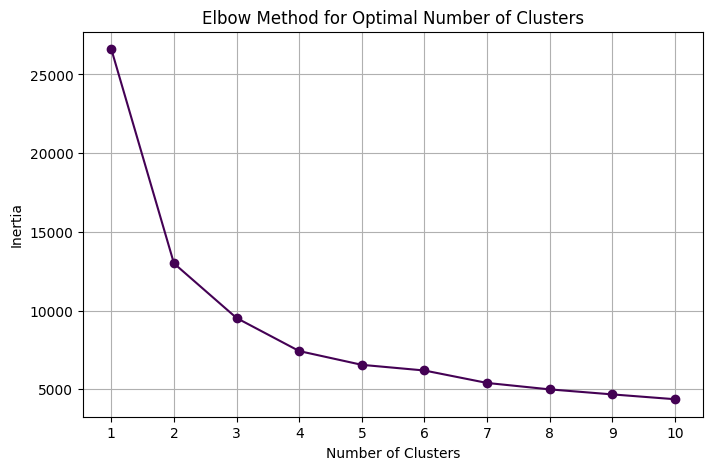

In [53]:
range_n_clusters = range(1, 11)
inertia = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(PCA_data_copy)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', color='#440154FF' )
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

Based on the Elbow Method, the optimal number of clusters identified is four. In the elbow graph, there is a noticeable point where the inertia begins to decrease at a slower rate, forming an "elbow." This suggests that adding more clusters beyond four results in diminishing returns, meaning that the additional clusters do not significantly improve the clustering quality. Choosing four clusters balances the complexity of the model with the need for interpretability, allowing for distinct groupings without overfitting. This configuration enhances the clarity of the clusters and helps in better understanding the underlying patterns in the data.
Next, I will fit the Agglomerative Clustering Model to get the final clusters. 

In [54]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(PCA_data_copy)
PCA_data_copy["Clusters"] = yhat_AC
data["Clusters"]= yhat_AC

Below is the 3D visualizations of the clusters that were identified using the Agglomerative clusterimg model.

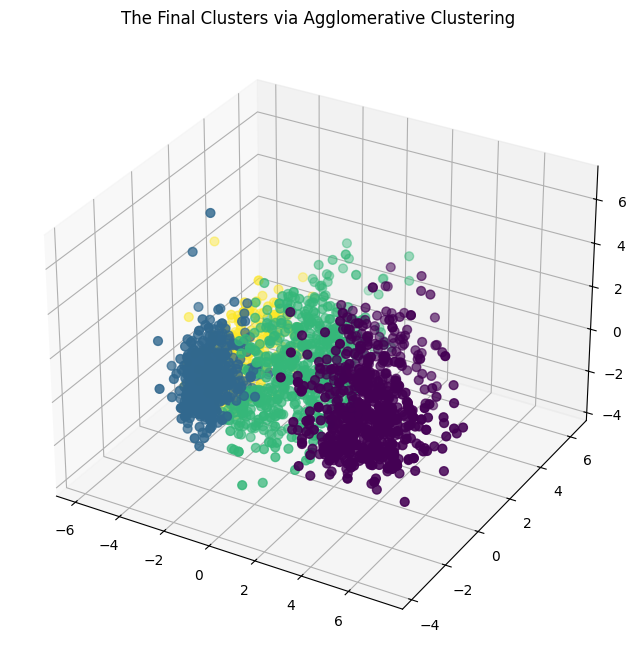

In [55]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_data_copy["Clusters"], cmap='viridis')
ax.set_title("The Final Clusters via Agglomerative Clustering")
plt.show()

# Model Evaluation

Since this clustering approach is unsupervised, I ladon't have a test set with labeled features to assess or score my model. Instead, in this section, I will analyze the patterns emerging from the clusters and their characteristics. To achieve this, I will conduct exploratory data analysis, examining the data in relation to the identified clusters and drawing conclusions about its perfomance from there. To start, I will investigate the distribution of the groups formed through clustering.

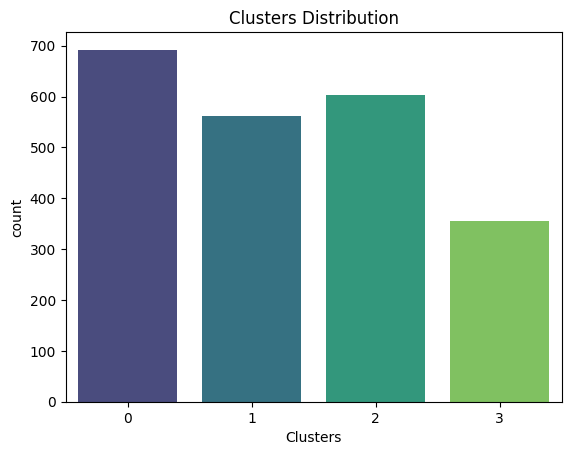

In [56]:
pl = sns.countplot(x=data["Clusters"], palette='viridis')
pl.set_title("Clusters Distribution")
plt.show()

The clusters generated from the agglomerative clustering technique exhibit a balanced distribution, with each cluster containing a roughly equal number of observations. This uniformity suggests that the algorithm has effectively identified distinct groups within the dataset, allowing for meaningful comparisons between clusters. Such an even distribution can enhance the reliability of the insights drawn from each cluster, as it indicates that no single group dominates the analysis. Consequently, this balance provides a solid foundation for further exploration of the underlying patterns and characteristics that differentiate the clusters.

The graph below is a scatter plot that visualizes the relationship between income and spending within the context of the identified clusters. By plotting the "Spent" variable on the x-axis and "Income" on the y-axis, the graph illustrates how different clusters are distributed based on these two key financial metrics. The use of color coding, indicated by the hue parameter, allows for easy identification of the distinct clusters, helping to reveal patterns or trends in spending behavior across various income levels. By examining this plot, I can gain insights into how different clusters relate to income and spending habits, which can inform targeted strategies or interventions for each group.

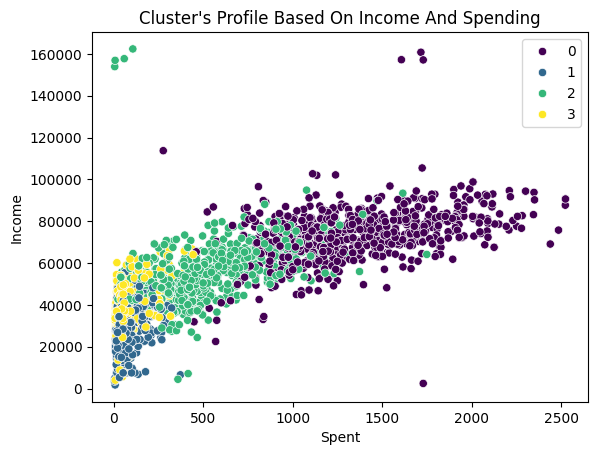

In [57]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette='viridis')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

From the plot above, it looks like:
* group 0: high spending & high income
* group 1: low spending & low income
* group 2: medium spending & medium income 
* group 3: low spending & medium income  

Next, I will analyze the detailed distribution of clusters based on various products within the dataset, specifically focusing on wines, fruits, meat, fish, sweets, and gold. This analysis aims to understand how different products contribute to the clustering results and identify any patterns or trends that may inform targeted marketing strategies or product recommendations.

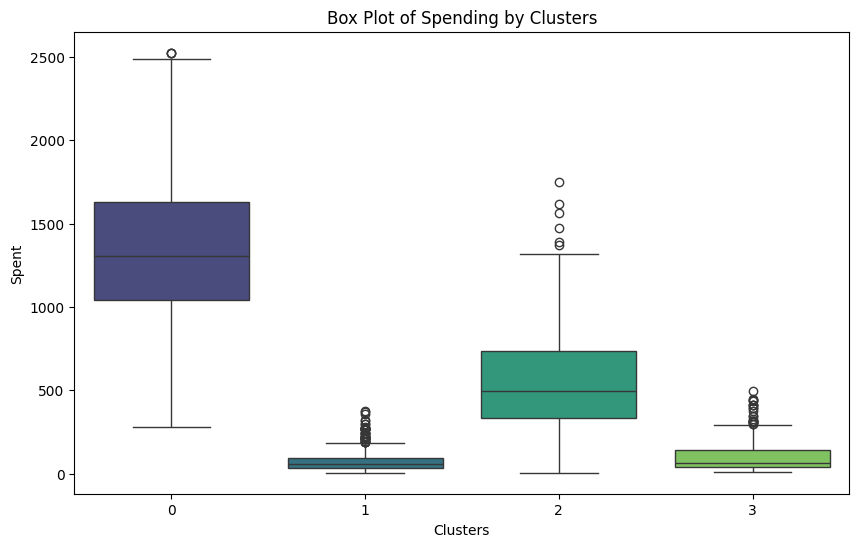

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data["Clusters"], y=data["Spent"], palette='viridis')
plt.title("Box Plot of Spending by Clusters")
plt.xlabel("Clusters")
plt.ylabel("Spent")
plt.show()

The plot above reveals that Cluster 0 represents the largest group of customers, with Cluster 2 closely following in size. This insight provides a valuable opportunity to delve deeper into the spending behaviors of each cluster. By analyzing what products or services each cluster prioritizes, I can develop targeted marketing strategies that effectively resonate with their preferences and maximize engagement. Understanding these spending patterns will enable me to tailor campaigns that cater to the unique needs and interests of these customer segments, ultimately driving higher conversion rates and customer satisfaction.

# PROFILING

Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. 
On the basis of the outcomes, I will be arriving at the conclusions. 

In [59]:
# Group by Clusters and calculate median for Age and Income, and counts for Education
cluster_summary_age_income_education = data.groupby("Clusters").agg({
    'Age': 'median',  # Median of Age
    'Education': lambda x: x.value_counts().to_dict(),  # Count of Education
    'Income': 'median',  # Median of Income
    'Marital_Status_Int': lambda x: x.value_counts().to_dict(),  # Count of Marital_Status_Int
    'Family_Size': 'median',  # Median of Family_Size
    'Kidhome': 'median',  # Median of Kidhome
    'Teenhome': 'median'  # Median of Teenhome
}).reset_index()

print(cluster_summary_age_income_education)

   Clusters   Age                 Education   Income    Marital_Status_Int  \
0         0  52.0   {0: 381, 1: 251, 2: 60}  73454.5  {2.0: 406, 1.0: 286}   
1         1  43.0  {0: 284, 1: 158, 2: 119}  28691.0  {2.0: 345, 1.0: 216}   
2         2  56.0   {0: 283, 1: 282, 2: 38}  55563.0  {2.0: 434, 1.0: 169}   
3         3  55.0   {0: 167, 1: 154, 2: 35}  38998.0  {2.0: 243, 1.0: 113}   

   Family_Size  Kidhome  Teenhome  
0          2.0      0.0       0.0  
1          3.0      1.0       0.0  
2          3.0      0.0       1.0  
3          4.0      1.0       1.0  


**Cluster 0** features an average age of 52 years and a median income of $73,454.50, indicating a financially stable demographic. The majority of individuals in this cluster are in relationships, with 406 having partners compared to 286 who are single. They have an average family size of 2, and notably, there are no children or teenagers at home. This suggests a lifestyle focused on personal spending, likely favoring premium products and experiences. With no dependents, individuals in this cluster may prioritize leisure and luxury items over family-oriented expenditures.

**Cluster 1** has a younger average age of 43 years, with a significantly lower median income of $28,691, pointing to a demographic that may be early in their careers or in transitional phases of life. The family size averages 3, with one child and no teenagers, indicating a blend of personal and family-oriented spending. The majority are in relationships (345) compared to the 216 who are single, suggesting that they might be navigating the challenges of parenthood while still enjoying some degree of financial freedom. This cluster likely shows a preference for value-driven purchases, balancing their financial limitations with the needs of their small family.

**Cluster 2** has an average age of 56 years and a median income of $55,563. This cluster is notable for having the highest number of individuals in relationships (434) versus those who are single (169). With an average family size of 3, they have one child and one teenager at home, indicating a balance of responsibilities between family and personal interests. Their spending patterns may reflect an investment in both family-oriented activities and products that cater to personal enjoyment. This demographic could be inclined toward products that enhance family life while also valuing experiences that cater to their personal preferences.

**Cluster 3** features an average age of 55 years with a median income of $38,998, indicating a mix of stability and potential financial constraints. This cluster has the largest average family size at 4, including one child and one teenager, suggesting a stronger focus on family needs. With 243 individuals in relationships and 113 identified as single, the dynamics of this cluster reflect a community that values family but may also experience the challenges of managing finances with dependents. Their spending might prioritize essentials and family activities, indicating a need for products that cater to both the adult and teenage demographic in the household.


In [60]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Account_Age', 'Age', 'Spent',
       'Marital_Status_Int', 'Children', 'Family_Size', 'Clusters'],
      dtype='object')

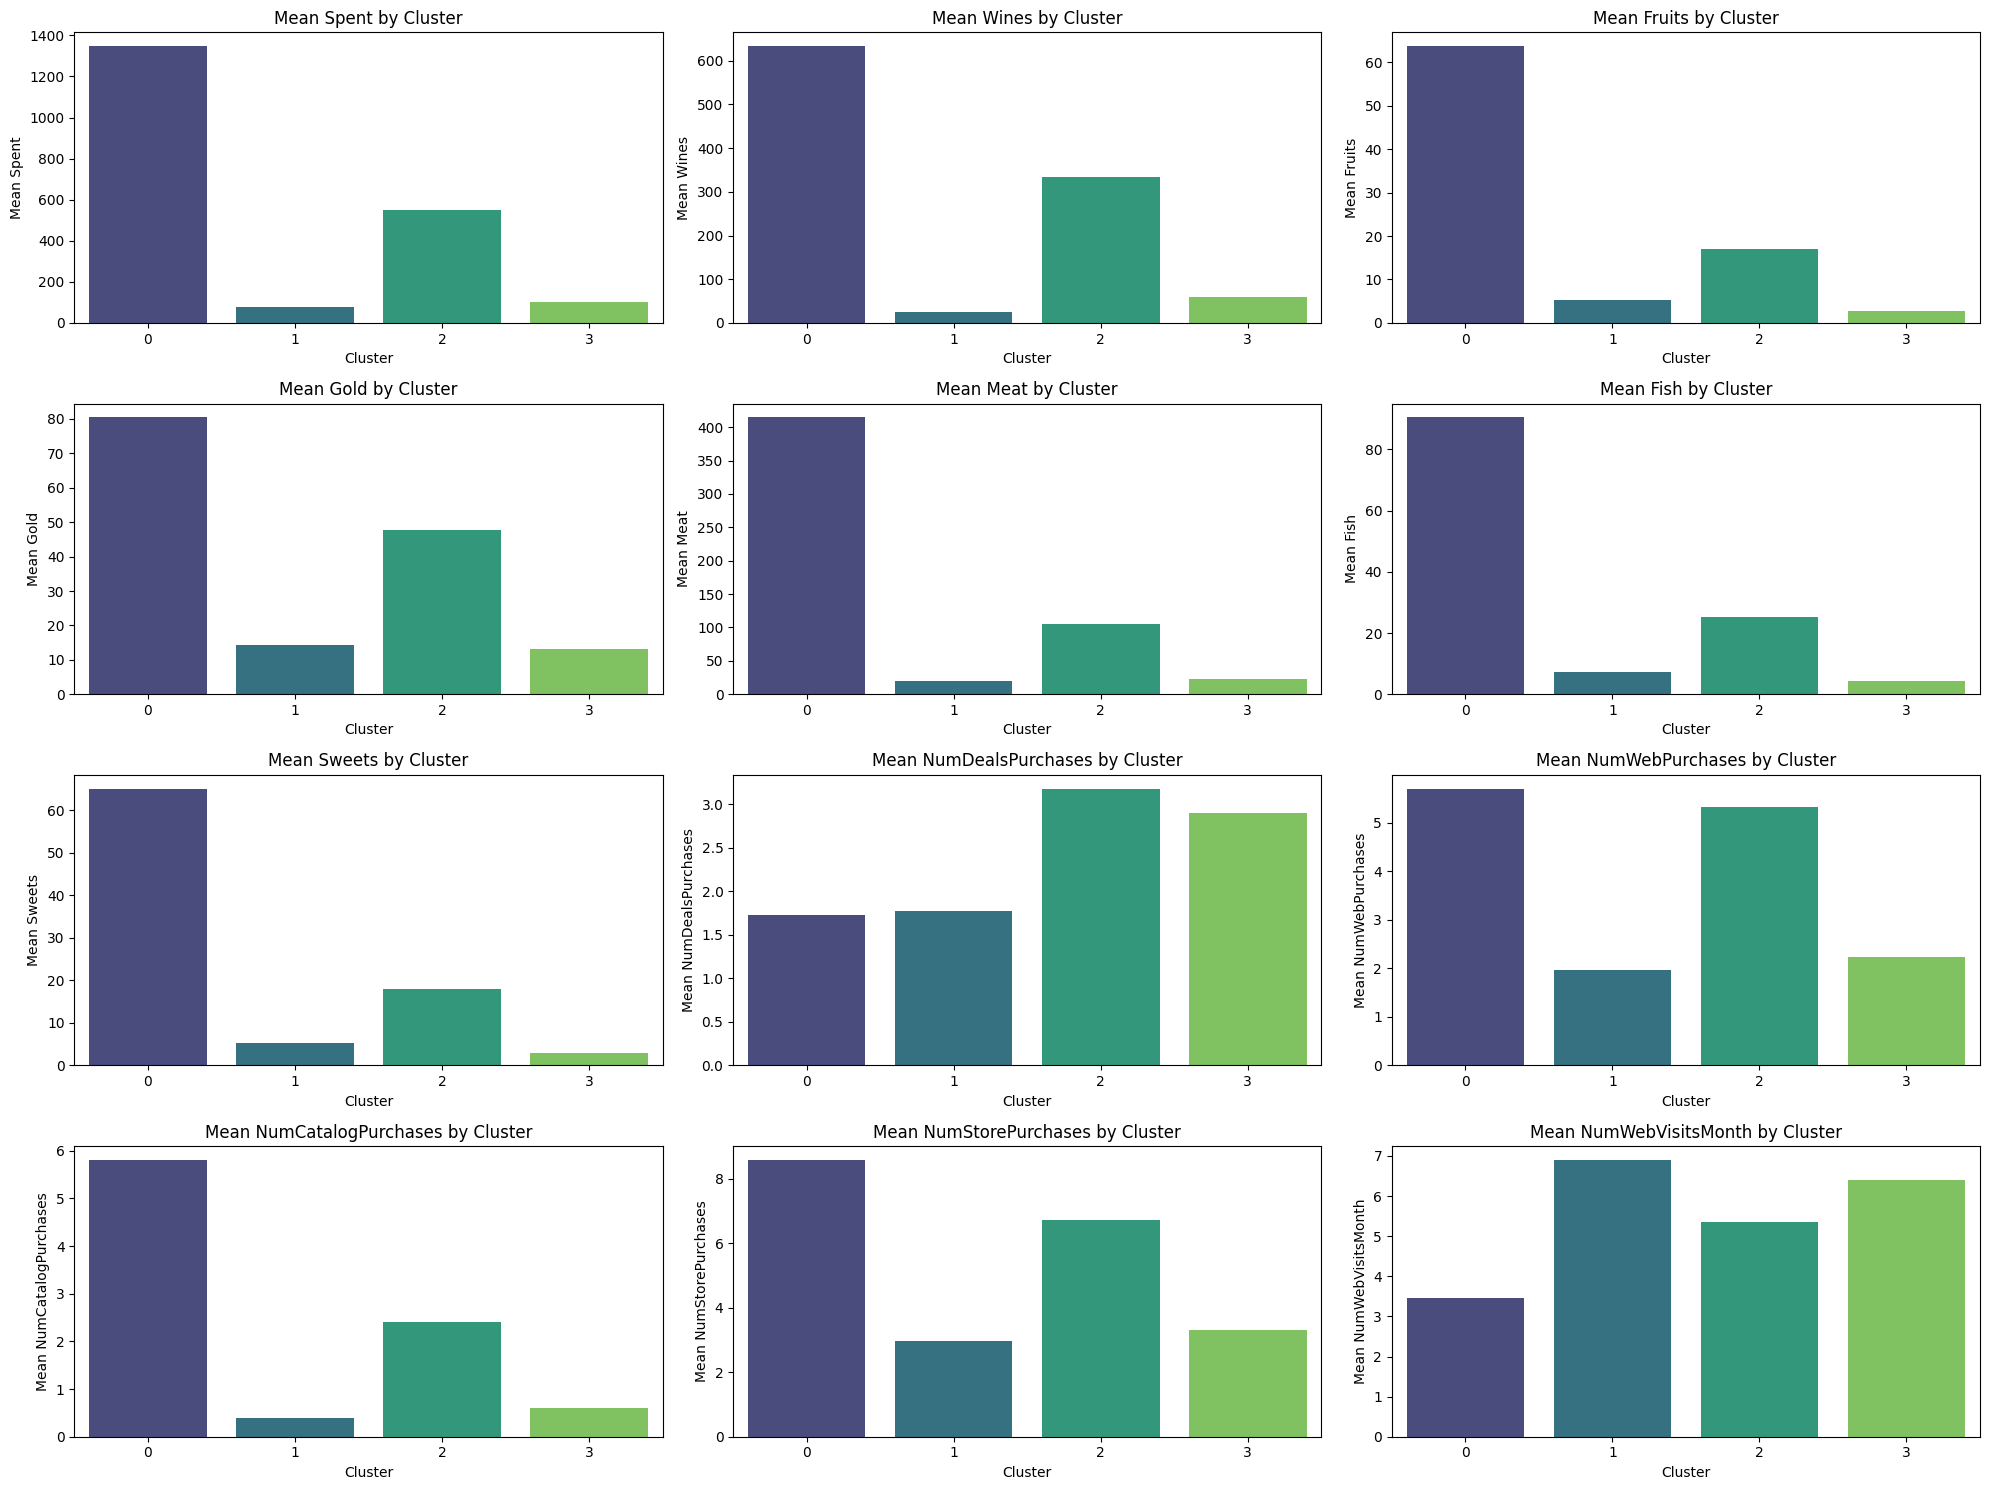

In [61]:
cluster_summary_spending_products = data.groupby("Clusters").agg({
    'Spent': 'mean',  
    'Wines': 'mean',  
    'Fruits': 'mean',  
    'Gold': 'mean',  
    'Meat': 'mean',  
    'Fish': 'mean',  
    'Sweets': 'mean',  
    'NumDealsPurchases': 'mean',  
    'NumWebPurchases': 'mean',  
    'NumCatalogPurchases': 'mean',  
    'NumStorePurchases': 'mean',  
    'NumWebVisitsMonth': 'mean'  
}).reset_index()

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axes = axes.flatten()

columns = ['Spent', 'Wines', 'Fruits', 'Gold', 'Meat', 'Fish', 'Sweets', 
           'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
           'NumStorePurchases', 'NumWebVisitsMonth']

for ax, col in zip(axes, columns):
    sns.barplot(x='Clusters', y=col, data=cluster_summary_spending_products, ax=ax, palette='viridis')
    ax.set_title(f'Mean {col} by Cluster')
    ax.set_ylabel(f'Mean {col}')
    ax.set_xlabel('Cluster')

plt.tight_layout()
plt.show()

**Cluster 0**: The purchasing habits of customers in this group indicate a highly engaged and affluent demographic that prioritizes quality products, particularly wines. Their strong preference for wine consumption, combined with substantial spending on meat and gold, suggests they value premium items and may be motivated by status or lifestyle choices. This cluster's higher engagement in both online and in-store purchases demonstrates a well-rounded shopping behavior, indicating that they are likely receptive to targeted marketing strategies that highlight exclusive deals and premium offerings.

**Cluster 1**: This cluster represents a budget-conscious demographic with significantly lower spending levels across the board. Their minimal expenditures on wines and fruits suggest that they may prioritize essential purchases over luxury items. However, their relatively high frequency of web visits points to an interest in exploring products and deals online, which presents an opportunity for marketers. By tailoring promotions to convert their browsing into purchasing behavior, businesses could effectively engage this group and encourage higher spending.

**Cluster 2**: Customers in this cluster showcase a balanced spending pattern, demonstrating a clear interest in wines and meat. This indicates a potential affinity for culinary experiences or entertaining, which can be capitalized on by brands looking to promote food and beverage pairings. Their moderate engagement with online deals and a reasonable number of store purchases suggest that they are open to exploring new products but might benefit from personalized marketing efforts that cater to their preferences for quality food items and lifestyle experiences.

**Cluster 3**: This cluster reveals a more selective purchasing behavior, with modest spending on wines and meat, suggesting a focus on value rather than luxury. Their lower engagement in promotional deals and online purchases indicates that they may not be as motivated by marketing strategies targeting premium products. Instead, this group could benefit from campaigns that emphasize quality at a lower price point, potentially attracting them with value-based messaging. Overall, understanding these nuances in purchasing habits can guide marketing strategies that resonate with each cluster's unique preferences and behaviors.

# CONCLUSION

In this project, I focused on unsupervised learning techniques, specifically employing Principal Component Analysis (PCA) for dimensionality reduction followed by agglomerative clustering. Unsupervised learning is valuable in situations where we want to identify patterns or groupings within data without prior labeling. In this context, it allows for a deeper understanding of customer segments based on their behaviors and demographics.

To facilitate the clustering process, I used PCA to reduce the dataset to three dimensions. This choice was driven by the need to simplify complex data while retaining as much variance as possible. Reducing the dimensions to three enables effective visualization of the clusters and helps in understanding the relationships among different features. By focusing on the three principal components that capture the majority of the data variance, I could streamline the dataset without significant loss of information, making it more manageable for subsequent analysis.

Following PCA, I applied agglomerative clustering to group customers into distinct segments based on their attributes. This hierarchical approach is advantageous as it does not require a predefined number of clusters and allows for a flexible exploration of the data. However, I encountered challenges during this phase, particularly in ensuring the interpretability of the resulting clusters. Some clusters appeared too broad, making it difficult to draw actionable insights. 

To improve future efforts, I plan to further explore techniques such as silhouette analysis to determine the optimal number of clusters and enhance the interpretability of the results. Additionally, leveraging insights from past marketing campaigns will be crucial; by understanding previous successes and failures, I can refine the clustering process and develop more targeted marketing strategies. Integrating customer feedback and external market trends into the analysis will further enrich our understanding of customer preferences. Ultimately, these refinements will help us create more effective, personalized marketing campaigns that resonate with each identified segment.


### Citations

1. Romero-Hernandez, O. (Date Unknown). Customer Personality Analysis. Retrieved September 25, 2024 from https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis